--- Symptom Checker (Prime Number Input - With Graph & Action Plans) ---

                  LEGEND / HASH MAP (Rare Diseases Included)

--- Symptom Primes ---
  2     -> Abdominal pain
  3     -> Anxiety
  5     -> Ataxia
  7     -> Autonomic dysfunction
  11    -> Body aches
  13    -> Chills
  17    -> Confusion
  19    -> Cough
  23    -> Diarrhea
  29    -> Difficulty breathing
  31    -> Fatigue
  37    -> Fever
  41    -> Hallucinations
  43    -> Headache
  47    -> Itchy eyes
  53    -> Localized painful swelling
  59    -> Malformed great toe
  61    -> Memory loss
  67    -> Muscle weakness
  71    -> Myoclonus
  73    -> Nausea
  79    -> Pain
  83    -> Panic attacks
  89    -> Progressive severe insomnia
  97    -> Rapid cognitive decline
  101   -> Reduced joint mobility
  103   -> Runny nose
  107   -> Severe abdominal pain
  109   -> Sneezing
  113   -> Sore throat
  127   -> Swollen Tonsils
  131   -> Tachycardia
  137   -> Tingling in extremities
  139   -> Unsteady w

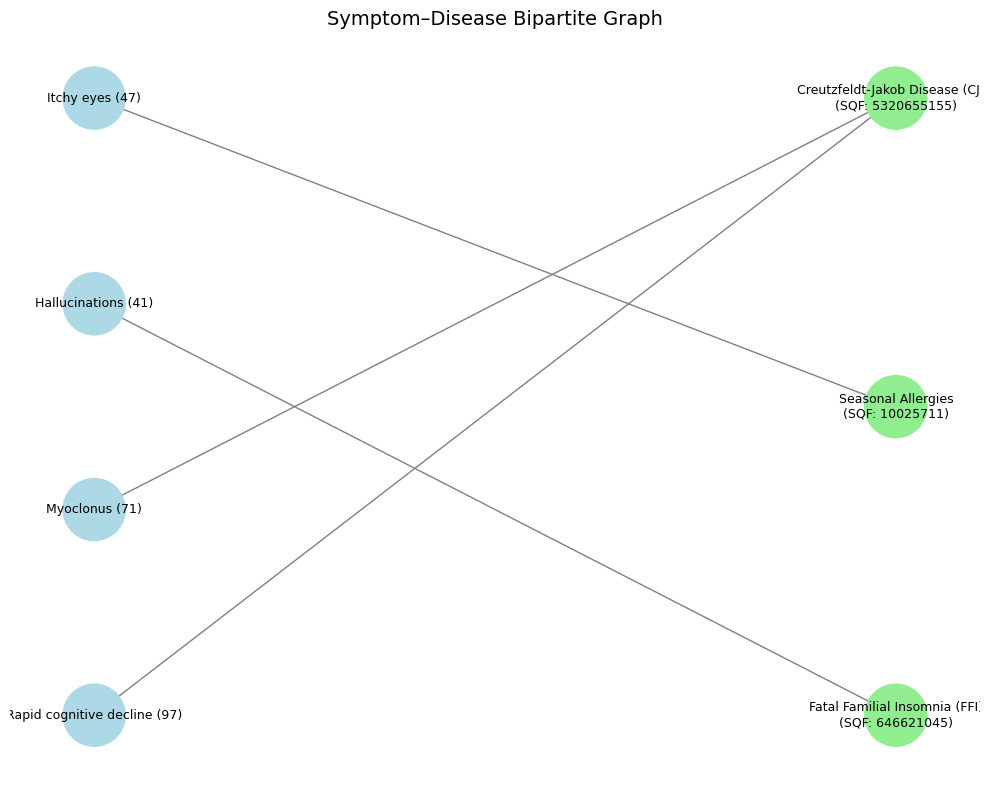

In [ ]:
import math
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# --- Prime Number Generation Helper ---
def is_prime(num):
    """Checks if a number is prime."""
    if num < 2:
        return False
    for i in range(2, int(math.sqrt(num)) + 1):
        if num % i == 0:
            return False
    return True

def generate_primes(count):
    """Generates the first 'count' prime numbers.
       Acceptable for a small number of symptoms."""
    primes = []
    num = 2
    while len(primes) < count:
        if is_prime(num):
            primes.append(num)
        num += 1
    return primes

# --- Optimized Symptom-Disease Data (Common & Rare) ---
disease_symptom_data_optimized = {
    # --- Common Diseases ---
    "Common Cold": {
        "Cough", "Sore throat", "Runny nose", "Sneezing", "Fatigue"
    },
    "Influenza": {
        "Fever", "Cough", "Sore throat", "Runny nose", "Body aches",
        "Fatigue", "Headache", "Chills"
    },
    "Strep Throat": {
        "Fever", "Sore throat", "Headache", "Swollen Tonsils",
        "Fatigue", "Nausea"
    },
    "Seasonal Allergies": {
        "Runny nose", "Sneezing", "Itchy eyes", "Cough"
    },

    # --- Rare Diseases ---
    "Acute Intermittent Porphyria (AIP)": {
        "Severe abdominal pain", "Nausea", "Muscle weakness",
        "Confusion", "Anxiety", "Tachycardia"
    },
    "Creutzfeldt-Jakob Disease (CJD)": {
        "Rapid cognitive decline", "Memory loss", "Myoclonus",
        "Ataxia", "Confusion", "Visual disturbances"
    },
    "Fibrodysplasia Ossificans Progressiva (FOP)": {
        "Malformed great toe", "Localized painful swelling",
        "Reduced joint mobility", "Difficulty breathing"
    },
    "Fatal Familial Insomnia (FFI)": {
        "Progressive severe insomnia", "Panic attacks", "Hallucinations",
        "Ataxia", "Memory loss", "Autonomic dysfunction"
    },
    "Guillain-Barré Syndrome (GBS)": {
        "Muscle weakness", "Tingling in extremities",
        "Unsteady walk (Ataxia)", "Difficulty breathing",
        "Autonomic dysfunction", "Pain"
    },

    # --- Another Common Illness ---
    "Gastroenteritis (Stomach Flu)": {
        "Nausea", "Vomiting", "Diarrhea", "Abdominal pain",
        "Fever", "Headache"
    }
}

# --- Action Plan Guidance for Each Disease ---
# (You can customize these messages as you wish)
disease_action_plan = {
    "Common Cold": "Usually self-limiting. Rest, hydrate, and see a doctor if symptoms worsen.",
    "Influenza": "Consider antiviral medication if severe; rest and hydration are important.",
    "Strep Throat": "See a healthcare provider for possible antibiotics; rest and fluids.",
    "Seasonal Allergies": "Antihistamines or nasal steroids may help; consult allergist for severe cases.",
    "Acute Intermittent Porphyria (AIP)": (
        "Seek specialist care promptly. Avoid trigger medications; high glucose infusion sometimes needed."
    ),
    "Creutzfeldt-Jakob Disease (CJD)": (
        "Consult a neurologist immediately. Unfortunately, no cure. Supportive care is critical."
    ),
    "Fibrodysplasia Ossificans Progressiva (FOP)": (
        "Early diagnosis is essential. Avoid trauma, consult a specialist for supportive management."
    ),
    "Fatal Familial Insomnia (FFI)": (
        "Extremely rare. Requires specialized neurological evaluation and supportive therapies."
    ),
    "Guillain-Barré Syndrome (GBS)": (
        "May need hospitalization for IVIG or plasmapheresis. Watch breathing closely."
    ),
    "Gastroenteritis (Stomach Flu)": (
        "Stay hydrated. Seek medical attention if severe dehydration or high fever occurs."
    )
}

# --- Generate Symptom / Prime Mappings ---
all_symptoms = sorted(list(set(
    symptom for symptoms_set in disease_symptom_data_optimized.values()
    for symptom in symptoms_set
)))
primes_list = generate_primes(len(all_symptoms))
symptom_to_prime = {symptom: primes_list[i] for i, symptom in enumerate(all_symptoms)}
prime_to_symptom = {prime: symptom for symptom, prime in symptom_to_prime.items()}

# --- Calculate Square-Free Integers for Diseases ---
disease_to_sqf = {}
sqf_to_disease = defaultdict(list)
for disease, symptoms_set in disease_symptom_data_optimized.items():
    sqf_integer = 1
    for symptom in symptoms_set:
        prime = symptom_to_prime.get(symptom)
        if prime:
            sqf_integer *= prime
    disease_to_sqf[disease] = sqf_integer
    sqf_to_disease[sqf_integer].append(disease)

# --- Core Matching Logic ---
def calculate_disease_matches_numeric(user_symptom_primes, disease_sqf_map):
    """Counts matches based on prime factors (modulus check)."""
    match_counts = defaultdict(int)
    if not user_symptom_primes:
        return {}
    for disease, disease_sqf in disease_sqf_map.items():
        count = 0
        for prime in user_symptom_primes:
            if disease_sqf % prime == 0:
                count += 1
        if count > 0:
            match_counts[disease] = count
    return dict(match_counts)

# --- Graph Visualization with networkx ---
def visualize_graph_numeric(user_symptom_primes, matched_disease_sqfs, prime_map, sqf_map):
    """Creates a bipartite graph to visualize the relationship between user symptom primes and diseases."""
    if not user_symptom_primes or not matched_disease_sqfs:
        print("No data to visualize.")
        return

    # Create a bipartite graph
    G = nx.Graph()

    # Mark left side (symptoms) and right side (diseases). We'll store in sets for bipartite_layout
    left_nodes = []
    right_nodes = []

    # Add symptom nodes
    for p in user_symptom_primes:
        symptom_label = f"{prime_map.get(p, 'Unknown')} ({p})"
        G.add_node(symptom_label, bipartite=0)
        left_nodes.append(symptom_label)

    # Add disease nodes
    # Each "disease node" we label with the disease name and SQF integer
    # But note that multiple diseases can share an SQF; we handle them individually
    disease_node_map = {}  # Maps sqf -> list of node labels
    for sqf in matched_disease_sqfs:
        # e.g. "DiseaseName (SQF: 30)" if multiple diseases share same SQF
        diseases = sqf_map.get(sqf, [])
        for disease in diseases:
            node_label = f"{disease}\n(SQF: {sqf})"
            G.add_node(node_label, bipartite=1)
            right_nodes.append(node_label)
            # We'll store the node_label for connecting edges
            if sqf not in disease_node_map:
                disease_node_map[sqf] = []
            disease_node_map[sqf].append(node_label)

    # Add edges: for each prime, connect it to the diseases that are divisible
    for p in user_symptom_primes:
        for sqf in matched_disease_sqfs:
            if sqf % p == 0:
                # connect prime node to each disease node that has this sqf
                for disease_node in disease_node_map[sqf]:
                    symptom_node = f"{prime_map.get(p, 'Unknown')} ({p})"
                    G.add_edge(symptom_node, disease_node)

    # Now we position the bipartite graph
    pos = nx.bipartite_layout(G, left_nodes)
    
    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw_networkx(
        G, pos,
        node_color=['lightblue' if n in left_nodes else 'lightgreen' for n in G.nodes()],
        edge_color='gray',
        with_labels=True,
        font_size=9,
        node_size=2000
    )
    plt.title("Symptom–Disease Bipartite Graph", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def print_graph_structure_numeric(user_primes, matched_sqfs, prime_map, sqf_map):
    """Optional: if you still want the text-based bipartite edges in the console."""
    print("\n--- Bipartite Graph Structure (Prime Factors) [Textual] ---")
    print("Input Symptom Primes (Left):")
    user_primes_sorted = sorted(user_primes)
    for p in user_primes_sorted:
        print(f"  {prime_map.get(p, 'Unknown')}: {p}")

    print("\nMatched Disease SQF Integers (Right):")
    matched_sqfs_sorted = sorted(matched_sqfs)
    for n in matched_sqfs_sorted:
        disease_names = ", ".join(sqf_map.get(n, ['Unknown']))
        print(f"  {disease_names}: {n}")

    print("\nEdges (Prime Factor -> SQF Integer):")
    for p in user_primes_sorted:
        symptom_name = prime_map.get(p, 'Unknown Prime')
        for n in matched_sqfs_sorted:
            if n % p == 0:
                disease_names = ", ".join(sqf_map.get(n, ['Unknown Disease(s)']))
                print(f"  ({symptom_name} [{p}] -> {disease_names} [{n}])")
    print("--- End of Graph Structure ---\n")

def print_mappings(prime_map, sqf_map):
    """Print the complete mapping legends. Low overhead."""
    print("\n" + "="*60)
    print("                  LEGEND / HASH MAP (Rare Diseases Included)")
    print("="*60)

    print("\n--- Symptom Primes ---")
    for prime, symptom in sorted(prime_map.items()):
        print(f"  {prime:<5} -> {symptom}")

    print("\n--- Disease Square-Free Integers (SQF) ---")
    for sqf, diseases in sorted(sqf_map.items()):
        print(f"  {sqf:<15} -> {', '.join(diseases)}")
    print("="*60 + "\n")

def symptom_disease_demo_numeric():
    """Handles prime input, calculates matches, prints results, graph, restart prompt, etc."""
    print("--- Symptom Checker (Prime Number Input - With Graph & Action Plans) ---")
    print_mappings(prime_to_symptom, sqf_to_disease)

    input_str = input("Enter symptom prime numbers (comma-separated): ")
    raw_inputs = [s.strip() for s in input_str.split(',') if s.strip()]

    if not raw_inputs:
        print("No input provided.")
        return

    user_symptom_primes = []
    invalid_inputs = []
    valid_symptoms_found = []

    for val_str in raw_inputs:
        try:
            prime_candidate = int(val_str)
            if prime_candidate in prime_to_symptom:
                if prime_candidate not in user_symptom_primes:  # Ensure uniqueness
                    user_symptom_primes.append(prime_candidate)
                    valid_symptoms_found.append(prime_to_symptom[prime_candidate])
            else:
                invalid_inputs.append(f"{prime_candidate} (Not a valid symptom prime)")
        except ValueError:
            invalid_inputs.append(f"'{val_str}' (Not an integer)")

    user_symptom_primes.sort()

    if invalid_inputs:
        print(f"\nWarning: The following inputs are invalid: {', '.join(invalid_inputs)}")

    if not user_symptom_primes:
        print("No valid symptom primes provided. Cannot proceed.")
        return

    print(f"\nProcessing valid primes: {user_symptom_primes}")
    print(f"Corresponding symptoms: {', '.join(sorted(valid_symptoms_found))}")

    # Calculate disease matches
    disease_matches = calculate_disease_matches_numeric(user_symptom_primes, disease_to_sqf)

    if not disease_matches:
        print("\nNo diseases found matching these symptom primes.")
    else:
        # Prioritize: sort by highest match count, then by disease name
        prioritized_diseases = sorted(
            disease_matches.items(),
            key=lambda item: (-item[1], item[0])
        )

        # Summarize diseases for the user
        matched_diseases = [d for d, count in prioritized_diseases]
        disease_list_str = ", ".join(matched_diseases)
        print(f"\nHere are the diseases you MAY have, based on your symptoms:\n{disease_list_str}")
        print("---\nPotential Diseases (Sorted by # of matching symptoms) ---")
        for disease, count in prioritized_diseases:
            sqf_val = disease_to_sqf.get(disease, 'N/A')
            print(f"  - {disease} (SQF: {sqf_val}, Matches: {count} prime factor(s))")
        print("---\n")

        # Action Plans
        print("=== ACTION PLANS FOR EACH MATCHED DISEASE ===")
        for disease in matched_diseases:
            plan = disease_action_plan.get(
                disease,
                "General advice: Consult a healthcare professional for further evaluation."
            )
            print(f"\n* {disease}:\n  {plan}")
        print("=============================================\n")

        # Prepare for graph structure
        matched_disease_sqfs = sorted(set(disease_to_sqf[disease] for disease in matched_diseases))

        # Print (optional) text-based edges
        print_graph_structure_numeric(user_symptom_primes, matched_disease_sqfs, prime_to_symptom, sqf_to_disease)

        # Show the bipartite graph
        visualize_graph_numeric(user_symptom_primes, matched_disease_sqfs, prime_to_symptom, sqf_to_disease)

    # Ask if user wants to restart
    restart_choice = input("\nWould you like to try again with a different set of symptom primes? (Y/N): ")
    if restart_choice.strip().lower() == 'y':
        print("\nRestarting...\n")
        symptom_disease_demo_numeric()  # Recursively rerun
    else:
        print("\nExiting. Stay healthy!")

# --- Main Entry Point ---
if __name__ == "__main__":
    symptom_disease_demo_numeric()